In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
# Load the dataset with the correct encoding
file_path = r"F:\OASIS\Task4_SMS_Spam_collection\archive (3)\spam.csv"

try:
    df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='iso-8859-1')


In [63]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [65]:
# Rename the columns for clarity
df.columns = ['label', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [67]:
# Drop the unnecessary columns
df = df[['label', 'text']]

In [69]:
# Inspect the dataset
print(df.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [73]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [75]:
# Convert labels to binary values
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

In [77]:
# Convert Text to Numerical Features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['text'])
y = df['label']

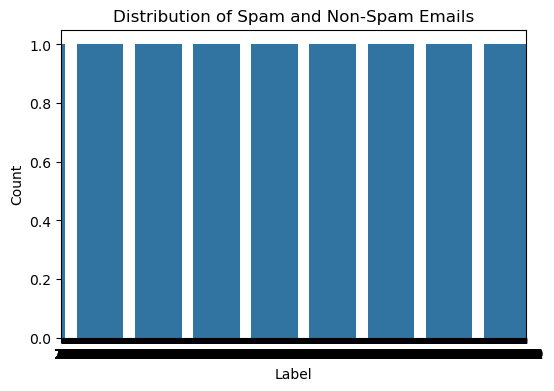

In [79]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(6, 4))
sns.countplot(df['label'])
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [80]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [82]:
# Model Evaluation
y_pred = model.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


In [84]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



In [85]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[962   3]
 [ 59  91]]


In [50]:
# Function to Predict New Emails
def predict_email(text):
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)
    return 'Spam' if prediction == 1 else 'Non-Spam'

In [51]:
# Example of Predicting a New Email
new_email = "Congratulations! You've won a free ticket to the Bahamas. Click here to claim your prize."
print(predict_email(new_email))

Spam
